# TRABAJO UT5: REGRESIÓN

Empezamos con la importación del .csv. He elegido un csv de precios de casas en Madrid del año 2022, con sus atributos. Mi objetivo en esta entrega es predecir los precios de las casas teniendo en cuenta distintos modelos.

In [ ]:
# Se monta el drive en el colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preparamos el entorno
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Importamos el csv
ruta = '/content/drive/MyDrive/CSVs/house_price_madrid.csv'
data = pd.read_csv(ruta,
                      header=0,
                      sep=",",
                      decimal=".",
                      quotechar="\"",
                      encoding='utf-8',
)
data

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela
...,...,...,...,...,...,...,...,...,...
15970,155000,planta 3,exterior,4,106.0,False,False,Villaverde Alto,villaverde
15971,108000,planta 3,exterior,3,60.0,False,False,San Cristóbal,villaverde
15972,140000,bajo,exterior,2,65.0,False,False,San Cristóbal,villaverde
15973,135000,planta 1,exterior,2,71.0,False,False,Los Rosales,villaverde


In [ ]:
data.dtypes

price             int64
house_type       object
house_type_2     object
rooms             int64
m2              float64
elevator           bool
garage             bool
neighborhood     object
district         object
dtype: object

## ANÁLISIS DE VARIABLES






Variable Objetivo:

* price

Variables Categóricas:

* house_type
* house_type_2
* neighborhood
* district

Variables Numéricas:

* rooms
* m2

Variables Booleanas:

* elevator
* garage

Voy a analizar como funcionan las variables categóricas para saber si las puedo eliminar, codificar...

In [ ]:
print('House_type')
print('Count: ', len(data['house_type'].unique()))
print(data['house_type'].unique())
print()
print('neighborhood')
print('Count: ', len(data['neighborhood'].unique()))
print(data['neighborhood'].unique()[1:30])
print()
print('district')
print('Count: ', len(data['district'].unique()))
print(data['district'].unique())
print()
print('House_type_2')
print('Count: ', len(data['house_type_2'].unique()))
print(data['house_type_2'].unique())

House_type
Count:  26
['planta 1' 'planta 2' 'planta 4' 'bajo' 'planta 3' 'planta 6' 'planta 5'
 'planta 8' 'planta 18' 'sotano' 'planta 7' 'planta 12' 'planta -1'
 'semi-sotano' 'entreplanta' 'planta 9' 'planta 11' 'casa' 'chalet'
 'planta 10' 'planta 15' 'planta 13' 'planta 19' 'planta 14' 'planta 16'
 'planta 20']

neighborhood
Count:  341
['Palos de Moguer' 'Legazpi' 'Acacias' 'Delicias' 'Imperial'
 'Dúplex en Legazpi' 'Dúplex en Imperial' 'Ático en Delicias'
 'Alameda de Osuna' 'Campo de las Naciones-Corralejos'
 'Chalet pareado en Campo de las Naciones-Corralejos'
 'Casco Histórico de Barajas' 'Timón'
 'Ático en Campo de las Naciones-Corralejos' 'Aeropuerto'
 'Chalet adosado en Alameda de Osuna' 'Chalet pareado en Alameda de Osuna'
 'Chalet adosado en Campo de las Naciones-Corralejos'
 'Dúplex en Casco Histórico de Barajas'
 'Casa o chalet independiente en Casco Histórico de Barajas' 'Recoletos'
 'Castellana' 'Goya' 'Fuente del Berro' 'Lista' 'Ático en Castellana'
 'Chalet adosad

## VALORES MISSING

In [ ]:
data.isnull().sum()

price             0
house_type        0
house_type_2    469
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

Los valores nulos los vamos a rellenar como interior o exterior según el porcentaje de exteriores e interiores que nos dan.

In [ ]:
total_count = len(data)
exterior_count = data['house_type_2'].value_counts().get('exterior', 0)
interior_count = data['house_type_2'].value_counts().get('interior', 0)

exterior_percentage = exterior_count / total_count
interior_percentage = interior_count / total_count
total_percentage = exterior_percentage + interior_percentage
exterior_percentage /= total_percentage
interior_percentage /= total_percentage

# Rellenar los valores nulos en house_type_2 basándose en los porcentajes
data.loc[data['house_type_2'].isnull(), 'house_type_2'] = \
    np.random.choice(['exterior', 'interior'],
                     size=data['house_type_2'].isnull().sum(),
                     p=[exterior_percentage, interior_percentage])


print(data['house_type_2'].isnull().sum())


0


## VARIABLE DUMMY

Tras ver

In [ ]:
data = pd.get_dummies(data, columns=['house_type_2'])
data.head()

,price,house_type,rooms,m2,elevator,garage,neighborhood,district,house_type_2_exterior,house_type_2_interior
0,495000,planta 1,3,118.0,True,True,Chopera,Arganzuela,1,0
1,485000,planta 2,2,82.0,True,True,Palos de Moguer,Arganzuela,1,0
2,315000,planta 2,2,72.0,False,False,Legazpi,Arganzuela,1,0
3,585000,planta 4,2,174.0,True,True,Palos de Moguer,Arganzuela,1,0
4,255000,bajo,3,75.0,False,False,Acacias,Arganzuela,1,0


In [ ]:
data = data.drop('house_type_2_interior', axis=1)

In [ ]:
label_encoder = LabelEncoder()


data['district'] = label_encoder.fit_transform(data['district'])
data['neighborhood'] = label_encoder.fit_transform(data['neighborhood'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

data.head()

,price,house_type,rooms,m2,elevator,garage,neighborhood,district,house_type_2_exterior
0,495000,5,3,118.0,True,True,124,0,1
1,485000,15,2,82.0,True,True,243,0,1
2,315000,15,2,72.0,False,False,219,0,1
3,585000,18,2,174.0,True,True,243,0,1
4,255000,0,3,75.0,False,False,2,0,1


## GRÁFICOS

<ipython-input-88-970c29e40805>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
<ipython-input-88-970c29e40805>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
<ipython-input-88-970c29e40805>:8: Use

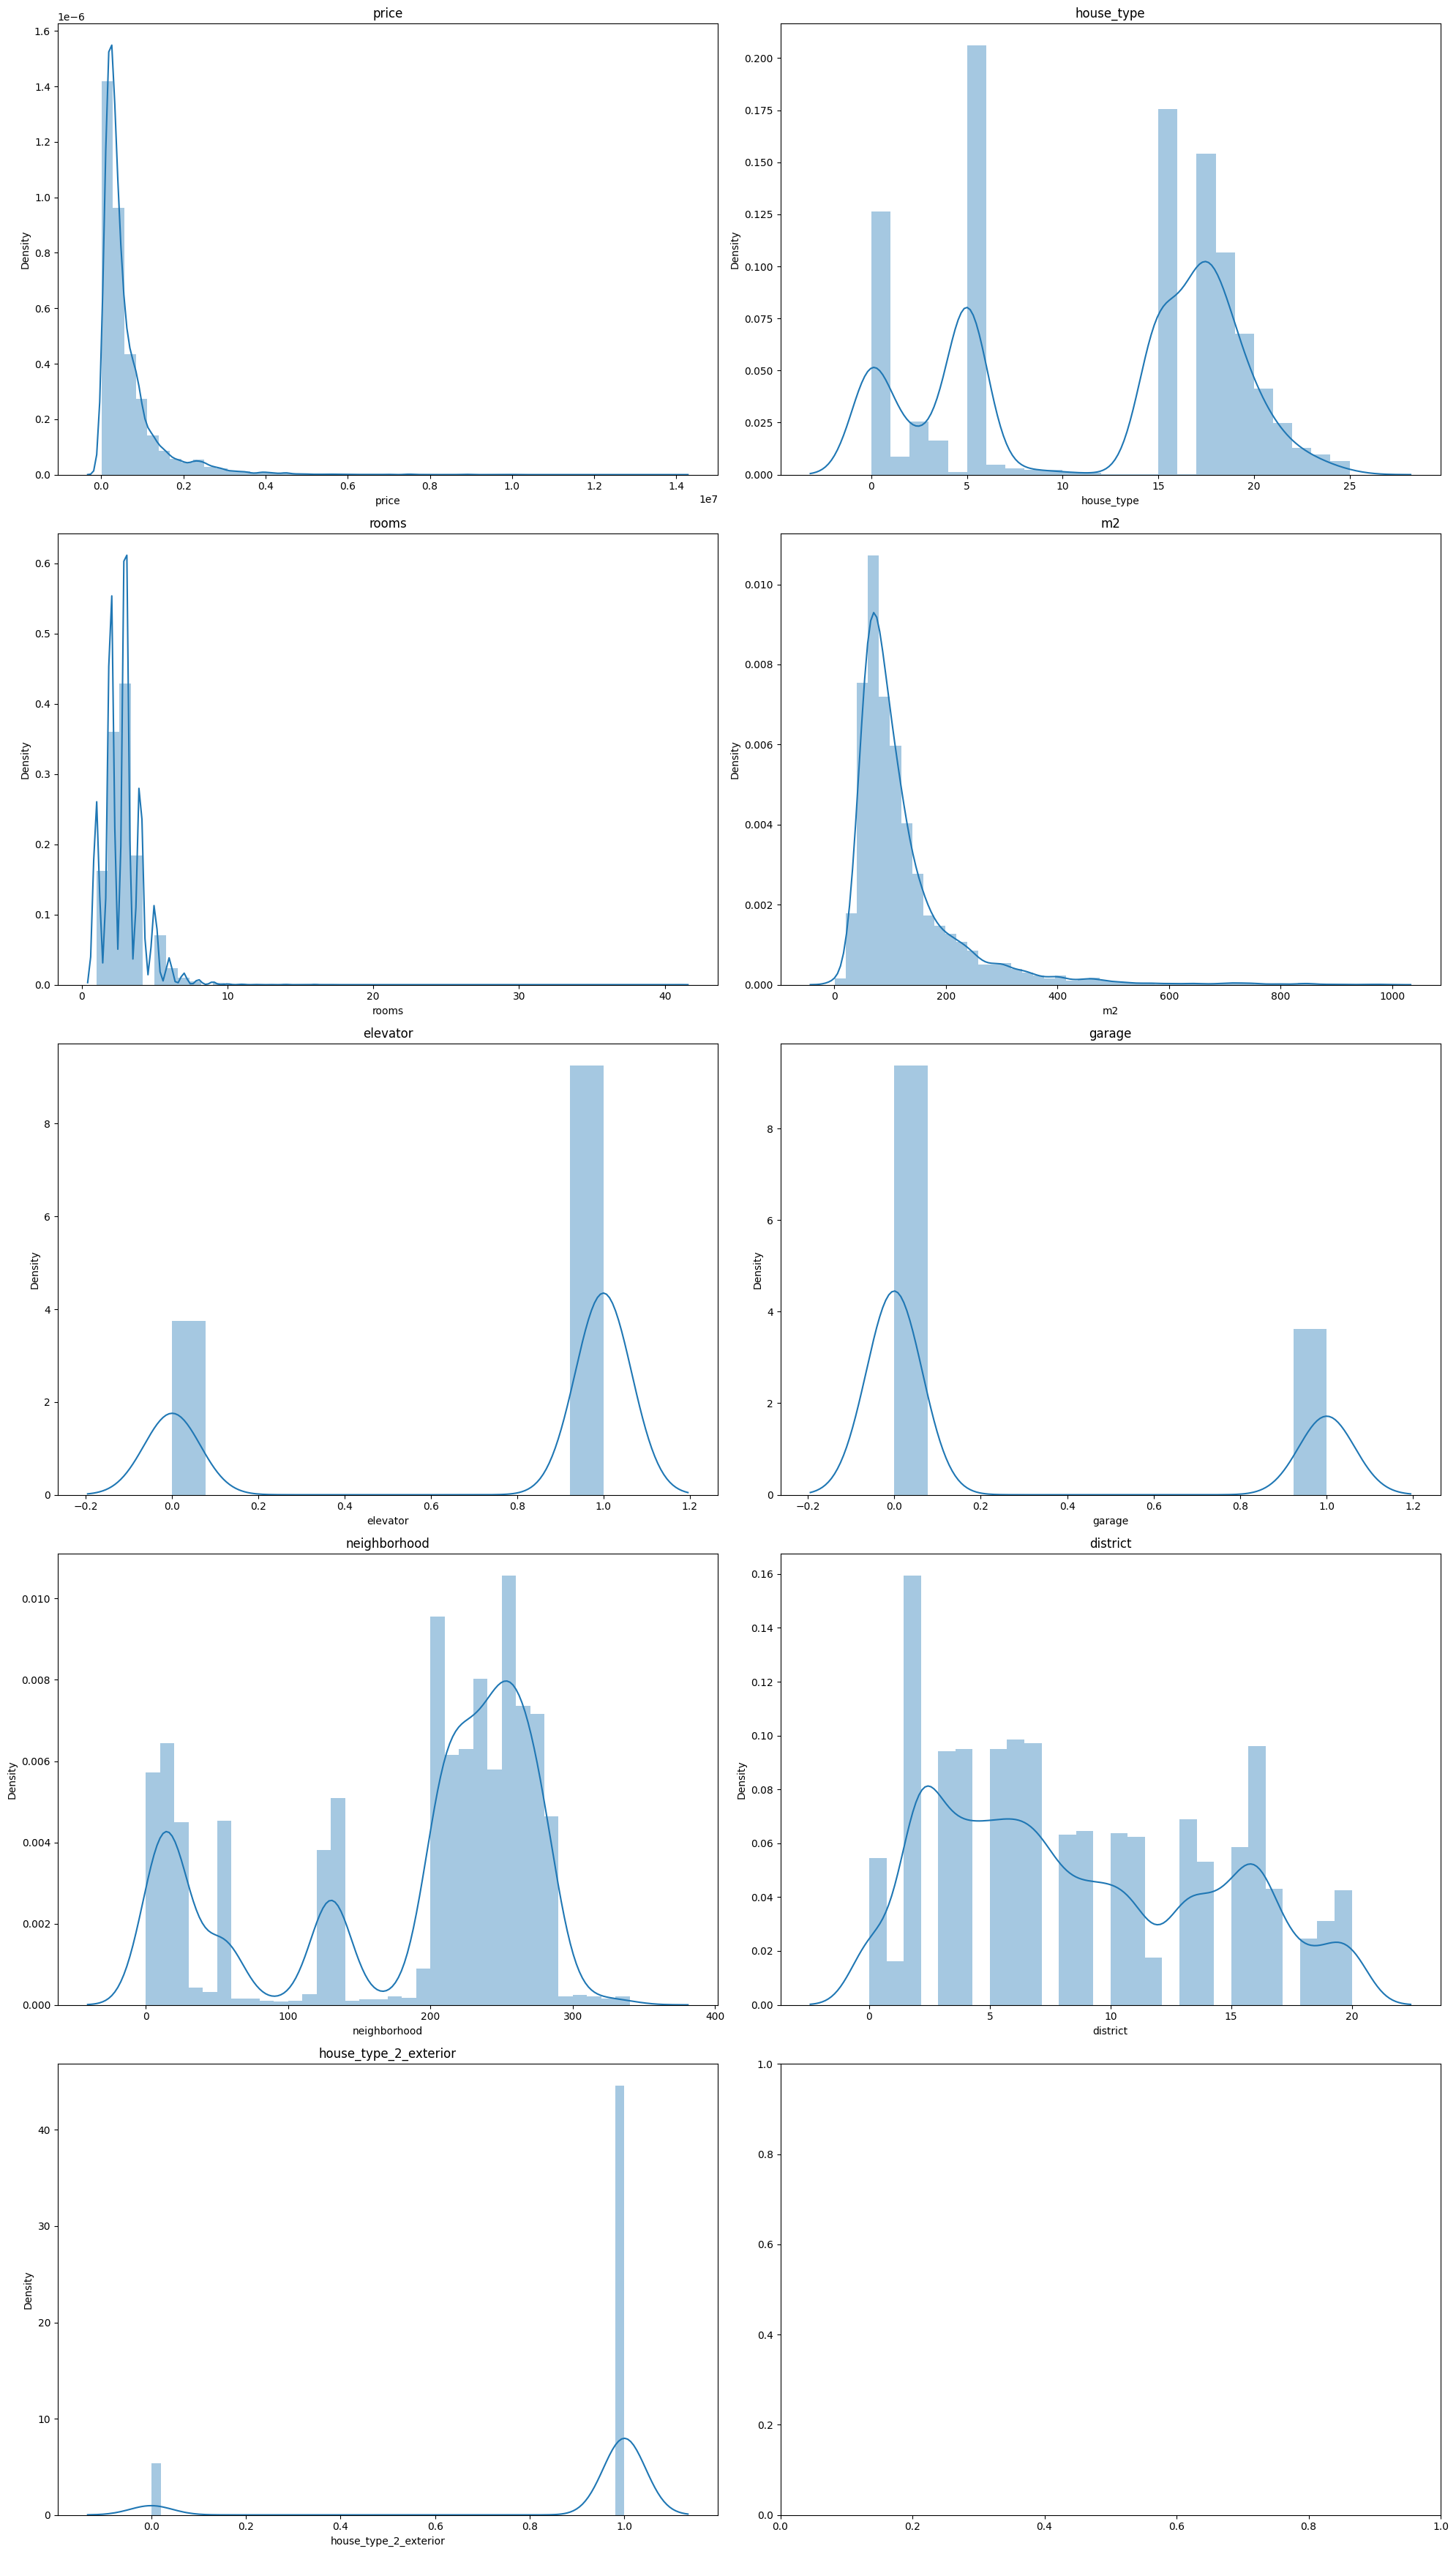

In [ ]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])

  ax[i,j].set_title(c)

  j+=1
  if j==2:
      i+=1
      j=0

plt.tight_layout()

## NORMALIZACIÓN

In [ ]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------price------
Skewness: 4.121787
Kurtosis: 29.460989
------house_type------
Skewness: -0.381989
Kurtosis: -1.432973
------rooms------
Skewness: 2.747774
Kurtosis: 44.330447
------m2------
Skewness: 3.161496
Kurtosis: 14.344261
------elevator------
Skewness: -0.937701
Kurtosis: -1.120857
------garage------
Skewness: 0.989065
Kurtosis: -1.021878
------neighborhood------
Skewness: -0.844689
Kurtosis: -0.796888
------district------
Skewness: 0.376642
Kurtosis: -1.039428
------house_type_2_exterior------
Skewness: -2.532781
Kurtosis: 4.415532


Tanto viendo los gráficos como el kurtosis y el skewness, se ve puede observar que hay que normalizar house_type_2_exterior, price, m2 y rooms

In [ ]:
# Skewness positiva y kurtosis alta
columns_to_normalize = ['m2', 'rooms', 'price']

features = data.drop(columns='price')


In [ ]:
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: x + 1e-10 if x.min() == 0 else x)
data[columns_to_normalize] = np.log(data[columns_to_normalize])



data.head()

,price,house_type,rooms,m2,elevator,garage,neighborhood,district,house_type_2_exterior
0,13.112313,5,1.098612,4.770685,True,True,124,0,1
1,13.091904,15,0.693147,4.406719,True,True,243,0,1
2,12.660328,15,0.693147,4.276666,False,False,219,0,1
3,13.279367,18,0.693147,5.159055,True,True,243,0,1
4,12.449019,0,1.098612,4.317488,False,False,2,0,1


In [ ]:
cols = data.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------price------
Skewness: 0.532761
Kurtosis: -0.095036
------house_type------
Skewness: -0.381989
Kurtosis: -1.432973
------rooms------
Skewness: -0.389848
Kurtosis: 0.075821
------m2------
Skewness: -0.236054
Kurtosis: 5.560281
------elevator------
Skewness: -0.937701
Kurtosis: -1.120857
------garage------
Skewness: 0.989065
Kurtosis: -1.021878
------neighborhood------
Skewness: -0.844689
Kurtosis: -0.796888
------district------
Skewness: 0.376642
Kurtosis: -1.039428
------house_type_2_exterior------
Skewness: -2.532781
Kurtosis: 4.415532


<Axes: >

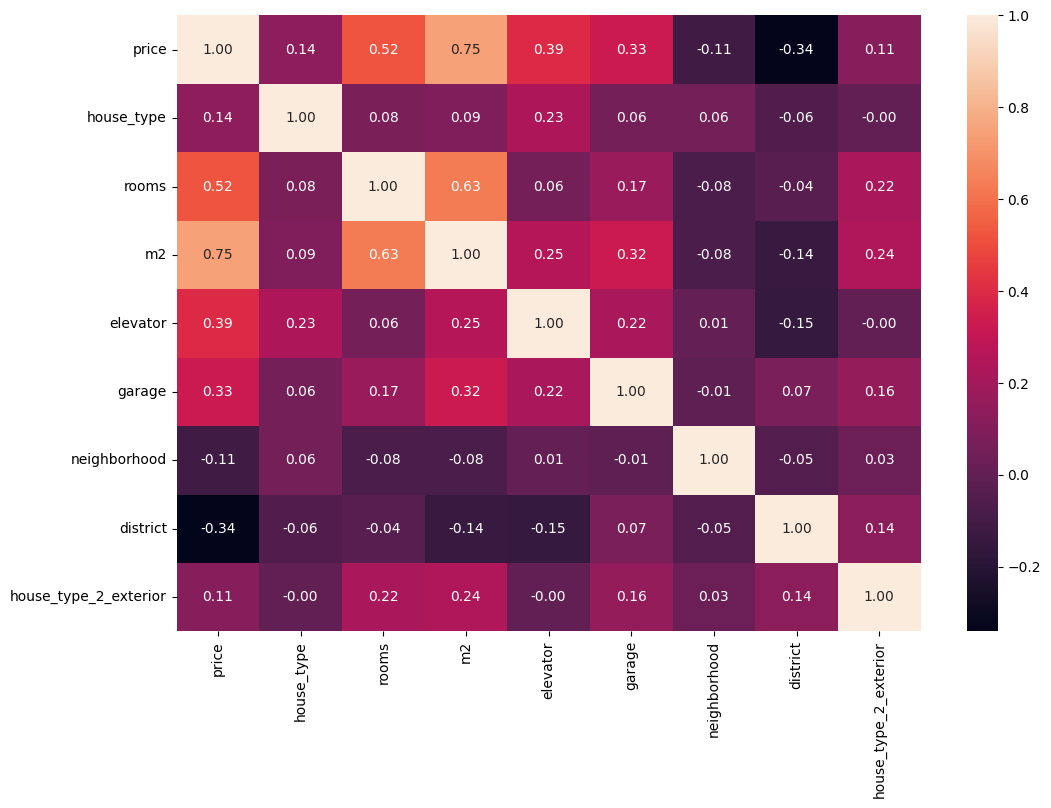

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

Como se puede observar las variables más correlativas con el precio son los m2 y las habitaciones. También encontramos otras como el ascensor, el distrito o el garage.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

## Regresión Lineal

In [ ]:
# Cogemos las columnas x y las normalizamos tanto para la simple como para la múltiple

scaler = MinMaxScaler()
feature = pd.DataFrame(data['m2'])
targets = pd.DataFrame(data['price'])
features = data.drop(columns='price')
features = scaler.fit_transform(features)
feature = scaler.fit_transform(feature)

Regresión lineal simple

In [ ]:
# separamos las x e y de tarin y test para la simple
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(feature, targets, test_size = 0.3,
                                                    random_state = 42)

In [ ]:
lr = LinearRegression()
# Entrenamos el modelo
lr.fit(X_train_simple, y_train_simple)

# Hacemos las predicciones
y_pred_simple = lr.predict(X_test_simple)
print(y_pred_simple)
print(y_test_simple)

[[13.27518021]
 [13.72290701]
 [12.7662809 ]
 ...
 [12.84427736]
 [12.28733418]
 [12.5035459 ]]
           price
1768   13.428376
1533   13.710150
9129   12.341477
12190  13.591116
12705  12.323856
...          ...
7631   13.641157
12623  11.917724
13088  12.323856
3231   11.652687
10637  12.128111

[4793 rows x 1 columns]


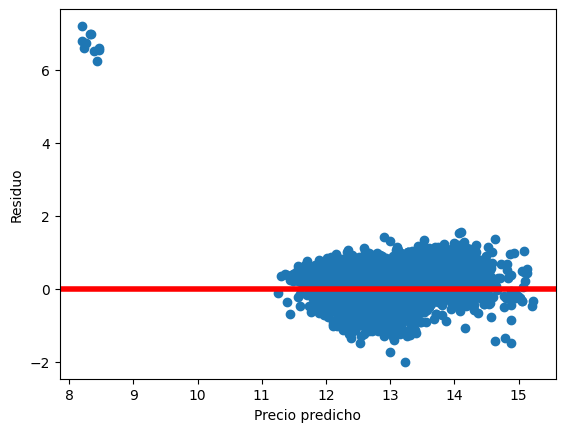

<ipython-input-98-d0b6f0d9c8b5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_simple-y_test_simple);


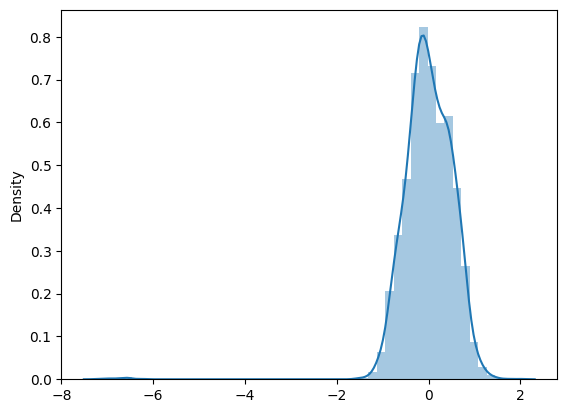

In [ ]:
plt.scatter(x = y_pred_simple, y = y_test_simple-y_pred_simple)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred_simple-y_test_simple);

Regresión lineal múltiple

In [ ]:
# separamos las x e y de tarin y test para la múltiple. También servirá para la polinomial
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(features, targets, test_size = 0.3,
                                                    random_state = 42)

In [ ]:
lr = LinearRegression()
# Entrenamos el modelo
lr.fit(X_train_mult, y_train_mult)

# Hacemos las predicciones
y_pred_mult = lr.predict(X_test_mult)
print(y_pred_mult)
print(y_test_mult)

[[13.48841588]
 [13.88550756]
 [12.5054711 ]
 ...
 [12.49062055]
 [12.13649244]
 [12.25418967]]
           price
1768   13.428376
1533   13.710150
9129   12.341477
12190  13.591116
12705  12.323856
...          ...
7631   13.641157
12623  11.917724
13088  12.323856
3231   11.652687
10637  12.128111

[4793 rows x 1 columns]


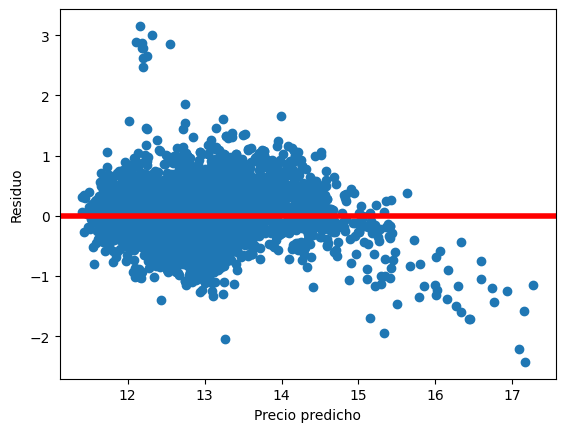

<ipython-input-101-247b95a90cb9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_mult-y_test_mult);


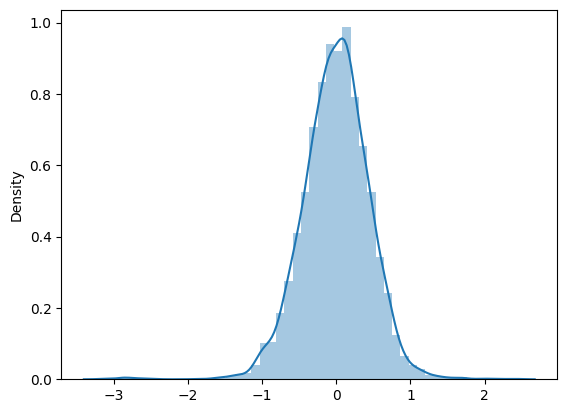

In [ ]:
plt.scatter(x = y_pred_mult, y = y_test_mult-y_pred_mult)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred_mult-y_test_mult);

Regresión lineal polinomial

In [ ]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train_mult)
lineal_poly_reg = LinearRegression()
lineal_poly_reg.fit(X_poly, y_train_mult)
X_poly_test = poly_reg.transform(X_test_mult)

y_pred_poly = lineal_poly_reg.predict(X_poly_test)
print(y_pred_poly)
print(y_test_mult)

[[13.65725147]
 [14.21579415]
 [12.29655759]
 ...
 [12.81452811]
 [12.24019297]
 [12.05129612]]
           price
1768   13.428376
1533   13.710150
9129   12.341477
12190  13.591116
12705  12.323856
...          ...
7631   13.641157
12623  11.917724
13088  12.323856
3231   11.652687
10637  12.128111

[4793 rows x 1 columns]


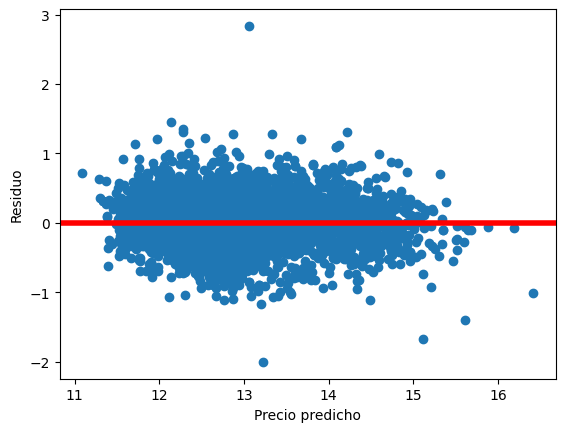

<ipython-input-103-8c46fbe5b4a7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_poly-y_test_mult);


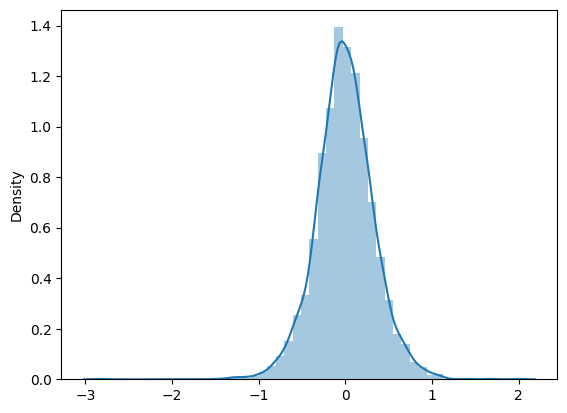

In [ ]:
plt.scatter(x = y_pred_poly, y = y_test_mult-y_pred_poly)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred_poly-y_test_mult);

In [ ]:
# The mean squared error
print('Regresión Lineal simple')
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test_simple, y_pred_simple))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test_simple, y_pred_simple))

print()

print('Regresión Lineal múltiple')
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test_mult, y_pred_mult))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test_mult, y_pred_mult))

print()

print('Regresión Lineal Polinomial')
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test_mult, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test_mult, y_pred_poly))



Regresión Lineal simple
Mean squared error: 0.32
Coefficient of determination (R2): 0.58

Regresión Lineal múltiple
Mean squared error: 0.20
Coefficient of determination (R2): 0.73

Regresión Lineal Polinomial
Mean squared error: 0.11
Coefficient of determination (R2): 0.85


## Máquinas de soporte vectorial

In [ ]:
from sklearn.svm import SVR
SVRregression = SVR(kernel = "rbf")
SVRregression.fit(X_train_mult, y_train_mult)
y_pred_svr = SVRregression.predict(X_test_mult)
print(y_pred_svr)
print(y_test_mult)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13.57910926 14.0906684  12.27277442 ... 12.64886001 12.03089306
 12.24004391]
           price
1768   13.428376
1533   13.710150
9129   12.341477
12190  13.591116
12705  12.323856
...          ...
7631   13.641157
12623  11.917724
13088  12.323856
3231   11.652687
10637  12.128111

[4793 rows x 1 columns]


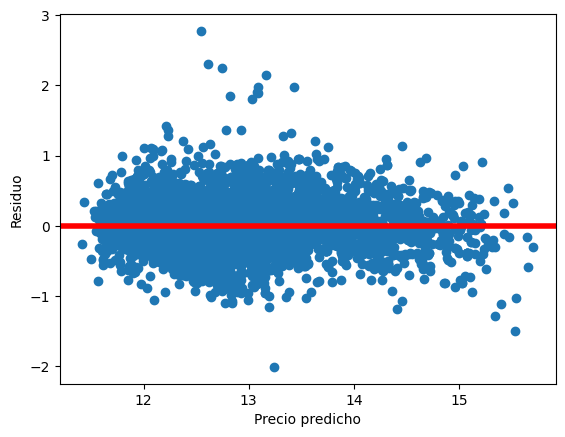

<ipython-input-106-254e5fddfe00>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_svr_flattened - y_test_mult_flattened);


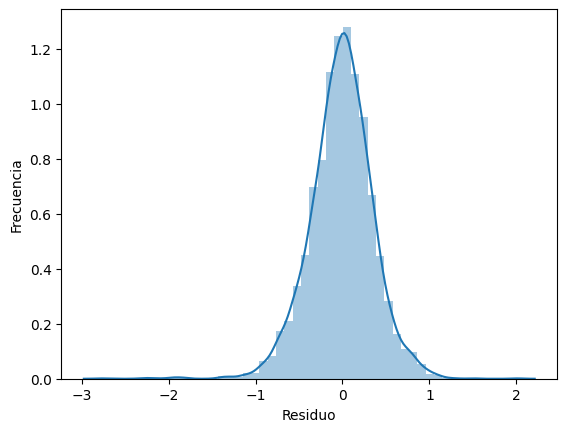

In [ ]:
# Aplanar las matrices bidimensionales
y_pred_svr_flattened = np.ravel(y_pred_svr)
y_test_mult_flattened = np.ravel(y_test_mult)

# Gráfico de dispersión
plt.scatter(x=y_pred_svr_flattened, y=y_test_mult_flattened - y_pred_svr_flattened)
plt.axhline(y=0, linewidth=4, color='r')
plt.xlabel('Precio predicho')
plt.ylabel('Residuo')
plt.show()

# Histograma de residuos
sns.distplot(y_pred_svr_flattened - y_test_mult_flattened);
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
print('SVR')
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test_mult, y_pred_svr))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test_mult, y_pred_svr))

SVR
Mean squared error: 0.13
Coefficient of determination (R2): 0.83


## Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Treeregression = DecisionTreeRegressor(random_state = 0)
Treeregression.fit(X_train_mult, y_train_mult)
y_pred_tree = Treeregression.predict(X_test_mult)

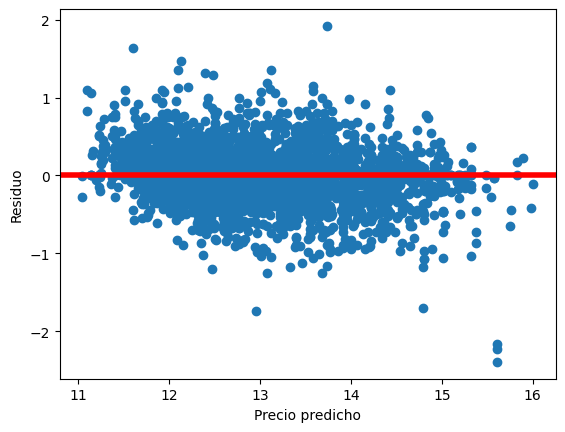

<ipython-input-109-f03918b068c8>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_tree_flattened - y_test_mult_flattened);


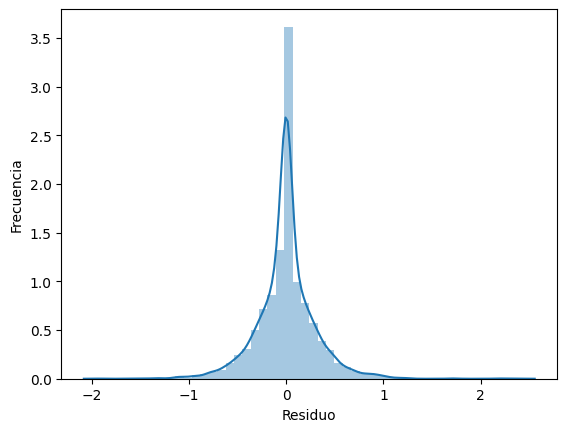

In [ ]:
# Aplanar las matrices bidimensionales
y_pred_tree_flattened = np.ravel(y_pred_tree)
y_test_mult_flattened = np.ravel(y_test_mult)

# Gráfico de dispersión
plt.scatter(x=y_pred_tree_flattened, y=y_test_mult_flattened - y_pred_tree_flattened)
plt.axhline(y=0, linewidth=4, color='r')
plt.xlabel('Precio predicho')
plt.ylabel('Residuo')
plt.show()

# Histograma de residuos
sns.distplot(y_pred_tree_flattened - y_test_mult_flattened);
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
print('DecisionTreeRegressor')
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test_mult, y_pred_tree))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test_mult, y_pred_tree))

DecisionTreeRegressor
Mean squared error: 0.09
Coefficient of determination (R2): 0.88


## Bosques aleatorios

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandForestregression = RandomForestRegressor(n_estimators = 10, random_state = 0)
RandForestregression.fit(X_train_mult, y_train_mult)
y_pred_forest = RandForestregression.predict(X_test_mult)

<ipython-input-111-292101759d9f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandForestregression.fit(X_train_mult, y_train_mult)


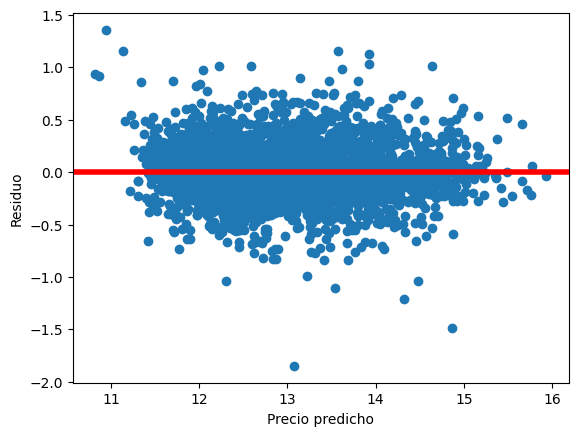

<ipython-input-112-37d8fdfb0494>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_fores_flattened - y_test_mult_flattened);


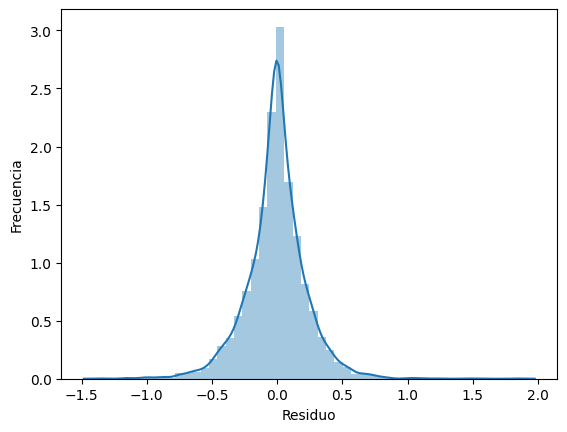

In [ ]:
# Aplanar las matrices bidimensionales
y_pred_fores_flattened = np.ravel(y_pred_forest)

# Gráfico de dispersión
plt.scatter(x=y_pred_fores_flattened, y=y_test_mult_flattened - y_pred_fores_flattened)
plt.axhline(y=0, linewidth=4, color='r')
plt.xlabel('Precio predicho')
plt.ylabel('Residuo')
plt.show()

# Histograma de residuos
sns.distplot(y_pred_fores_flattened - y_test_mult_flattened);
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
print('DecisionTreeRegressor')
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test_mult, y_pred_forest))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test_mult, y_pred_forest))



DecisionTreeRegressor
Mean squared error: 0.05
Coefficient of determination (R2): 0.93
